In [717]:
from math import sin, cos, log, ceil, pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [718]:
# model parameters:
g = 9.8    #gravity in meters per second squared
v_t = 4.9  # trim velocity in meters per second
C_D = 1/5  #drag coefficient
C_L = 1.0    #for convenience use C_L = 1

## set initial conditions ##
v0 = v_t   #start at the trim velocity (or add a delta)
theta0 = pi/2 #initial angle of the trajectory
theta_array = [pi/2, pi/3, pi/4, pi/8, 0] #array of theta values
x0 = 0     #horizontal position is arbitrary
y0 = 4  #initial altitude, standing on a mini ladder

In [719]:
def f(u):
 
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2, -g*cos(theta)/v + g/v_t**2*v, v*cos(theta), v*sin(theta)])

In [720]:
def euler_step(u, f, dt):
    
    return u + dt * f(u)

In [721]:
T = 4 #final time
dt = 0.1 #time increment
N = int(T/dt) + 1 #number of time-steps
t = numpy.linspace(0,T,N) #time discretization

#initialize the array containing the solution for each time-step
u = numpy.empty((N, 4)) #creates an array with 4 rows and N columns
u[0] = numpy.array([v0, theta0, x0, y0])
u_1 = numpy.empty((N, 4))
u_1[0] = numpy.array([v0, theta_array[1], x0, y0])
u_2 = numpy.empty((N, 4))
u_2[0] = numpy.array([v0, theta_array[2], x0, y0])
u_3 = numpy.empty((N, 4))
u_3[0] = numpy.array([v0, theta_array[3], x0, y0])
u_4 = numpy.empty((N, 4))
u_4[0] = numpy.array([v0, theta_array[4], x0, y0])
#time loop - Euler method
for n in range(N-1):
    
    u[n+1] = euler_step(u[n], f, dt)
    u_1[n+1] = euler_step(u_1[n], f, dt)
    u_2[n+1] = euler_step(u_2[n], f, dt)
    u_3[n+1] = euler_step(u_3[n], f, dt)
    u_4[n+1] = euler_step(u_4[n], f, dt)

In [722]:
#get the glider's position with respect to time
x = u[:,2]
y = u[:,3]
x_1 = u_1[:,2]
y_1 = u_1[:,3]
x_2 = u_2[:,2]
y_2 = u_2[:,3]
x_3 = u_3[:,2]
y_3 = u_3[:,3]
x_4 = u_4[:,2]
y_4 = u_4[:,3]

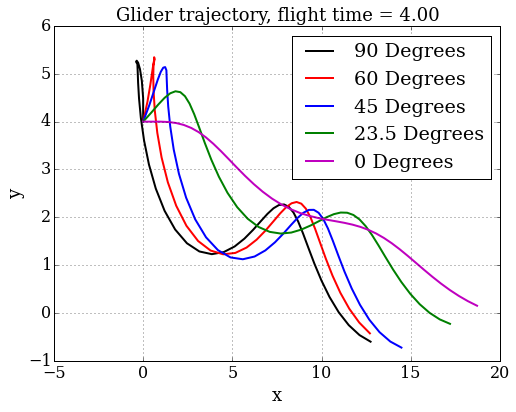

In [723]:
#visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y,'k-',lw=2);
pyplot.plot(x_1,y_1, 'r-', lw=2);
pyplot.plot(x_2,y_2, 'b-', lw=2);
pyplot.plot(x_3,y_3, 'g-', lw=2);
pyplot.plot(x_4,y_4, 'm-', lw=2);
pyplot.legend(['90 Degrees', '60 Degrees', '45 Degrees', '23.5 Degrees', '0 Degrees'])

Create an array dt_values that contains the time-increment of the five different grids we want solutions to.

Each elemtn dt_values[i] will have a solution u_values[i].

enumerate() will give consecutive index and value pairs as needed.

In [724]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1 #number of time-steps
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0]) # set the initial values
    
    #time loop
    for n in range(N-1):
        
        u[n+1] = euler_step(u[n], f, dt)  ### call euler_step() ###
        
    # store the value of u related to one grid
    u_values[i] = u

In [725]:
print (numpy.shape(dt_values))

(5,)


In [726]:
def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the 'finest' grid using the L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
        
    Returns
    -------
    diffgrid : float
        difference between the current and finest, computed using the L-1 norm
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum(numpy.abs(u_current[:,2]-u_fine[::grid_size_ratio,2]))
    ## [::n] does from start to finish in steps of n
    ## diff grid uses the x value arbitrarily.  Any value can be used.
    return diffgrid

In [727]:
# compute difference between one grid solution and the finest one
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))
    
    ### call the function get_diffgrid() ###
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


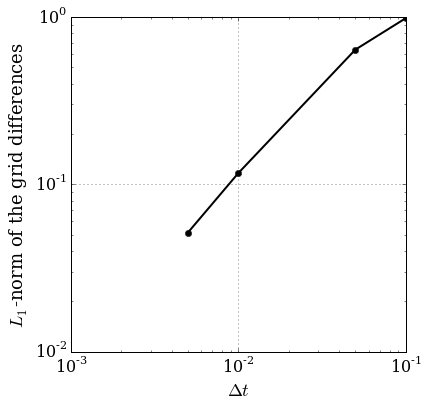

In [728]:
# log-log plot of the grid differences
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color = 'k', ls='-', lw=2, marker = 'o');

##dt_values[:-1] to use all dt values up to and not including the last one,##
##because you don't need to compare the finest grid to itself, the difference is 0##

In [729]:
r = 2
h = 0.001

dt_values2 = numpy.array([h, r*h, r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1 #number of time-steps
    
    ###discretize the time###
    t = numpy.linspace(0.0, T, N)
    
    #initialize the array containing the solution for each time-step
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    #time loop
    for n in range(N-1):
        
        u[n+1] = euler_step(u[n], f, dt) ## call euler_step() ##
        
    # store the value of u related to one grid
    u_values2[i] = u
    
#calculate f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calculate f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

#calculate the order of convergence

p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));

The order of convergence is p = 1.006
